In [106]:
# # ZIPCODEから事前に用意した平均住宅価格のカラムを加えてファイルに出力する。出力済みなのでコメントアウト
# import json
# with open("C:\\work\\AI\\workspace\\10.2_民博サービスの宿泊価格予測\\pricemap.json", "r") as f:
#     hoge = f.read() 
# hoge = json.loads(hoge.replace("'", '"'))
# import pandas as pd
# data1 = pd.read_csv("train.csv")
# data2 = pd.read_csv("test.csv")
# data1["house_price"] = data1["zipcode"]
# data2["house_price"] = data2["zipcode"]
# data1_2 = data1
# data2_2 = data2
# hp1 = data1_2["house_price"].replace(hoge)
# hp2 = data2_2["house_price"].replace(hoge)
# data1_2["house_price"] = hp1.fillna(743962)
# data2_2["house_price"] = hp2.fillna(743962)
# data1_2.to_csv("C:\\work\\AI\\workspace\\10.2_民博サービスの宿泊価格予測\\train2.csv", encoding="utf-8")
# data2_2.to_csv("C:\\work\\AI\\workspace\\10.2_民博サービスの宿泊価格予測\\test2.csv", encoding="utf-8")

In [107]:
# Chapter1
# NN構築試行
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score  # モデルの評価を行うための関数
from keras import metrics


pd.set_option("max_columns", 200)
pd.set_option('max_rows', None)
# 学習データ読み込み
data_X = pd.read_csv("train2.csv")
# data = data_X.dropna(how="any")
# data_X.fillna("", inplace=True)
data = data_X
data.head()

,Unnamed: 0,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y,house_price
0,0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,f,2016-07-27,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0,496059
1,1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0,603443
2,2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0,743962
3,3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0,1440449
4,4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0,1287128


In [132]:
from sklearn.model_selection import train_test_split
import optuna

# Chapter3
# データ前処理
feature_nums = ["accommodates","bathrooms","bedrooms","beds","latitude","longitude","number_of_reviews","review_scores_rating", "house_price"]
feature_obj = ["amenities","bed_type","cancellation_policy","city","cleaning_fee","description","first_review","host_has_profile_pic","host_identity_verified","host_response_rate","host_since","instant_bookable","last_review","name","neighbourhood","property_type","room_type","thumbnail_url","zipcode"]

def pre_process(input_data_X: pd.DataFrame):
    # temp_data = input_data_X.drop("amenities", axis=1)
    temp_data = input_data_X

    for feature in feature_nums:
        if feature in temp_data:
            temp_data[feature].fillna(temp_data[feature].mode(), inplace=True)
    for feature in feature_obj:
        if feature in temp_data:
            temp_data[feature].fillna("", inplace=True)

    processed_X = temp_data
    return processed_X
train_dataset = data

y_raw = train_dataset["y"]
X_raw = pre_process(train_dataset.drop(["y"], axis=1))

X_raw = X_raw.drop(["description", "id"], axis=1)


In [133]:
X_raw.head()

,Unnamed: 0,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,house_price
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,2016-07-27,t,f,,2016-07-13,f,2016-07-27,33.788931,-118.154761,The Penthouse,,1,Apartment,60.0,Private room,,90804,496059
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,603443
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,,743962
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,,94133,1440449
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,1287128


In [134]:
# # seleniumでZIPcodeから地価を取得し、置き換えるためのdictを作成→ZIPCODEを地価に入れ替える。（あるいはそのまま？）
# def init_driver():
#     from selenium import webdriver
#     from selenium.webdriver.support.ui import WebDriverWait
#     from selenium.webdriver.support import expected_conditions as EC
#     from selenium.webdriver.common.by import By

#     options = webdriver.ChromeOptions()
#     # options.add_argument('--headless')
#     driver = webdriver.Chrome(executable_path="C:\work\AI\workspace\99_tool\chromedriver.exe", options=options)
#     driver.set_page_load_timeout(600)
#     driver.get("https://www.zillow.com/washington-dc-20018/home-values/")
#     WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.ID, "local-search")))
#     return driver

# def get_price(driver, zipcode):
#     search_box = driver.find_element_by_id("local-search")
#     search_box.send_keys(zipcode)
#     search_box.submit()
#     WebDriverWait(driver, 300).until(EC.presence_of_element_located((By.XPATH, "/html/body/div[1]/div[6]/section[1]/div/div[1]/div[1]/h2")))
#     price = driver.find_element_by_xpath("/html/body/div[1]/div[6]/section[1]/div/div[1]/div[1]/h2")
#     return price.text

In [135]:
# X_data = pd.read_csv("test.csv")
# test_zipcodes = X_data["zipcode"].unique() 
# zipcodes = X_raw["zipcode"].unique() 
# driver = init_driver()

# zipcode_price_map = dict()
# errored_zipcode = list()
# for zipcode in hoge:
#     price = None
#     try:
#         if len(zipcode) >= 5:
#             if zipcode.startswith("Near"):
#                 price = get_price(driver, zipcode[-5:])
#             else:
#                 price = get_price(driver, zipcode[:5])
#             zipcode_price_map[zipcode] = price
#     except:
#         errored_zipcode.append(zipcode)
    

In [145]:
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2)

    # パラメータの指定
    params = {
        'iterations': trial.suggest_int('iterations', 1000, 3000),                         
        'depth': trial.suggest_int('depth', 4, 10),                                       
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),               
        'random_strength': trial.suggest_int('random_strength', 0, 100),                       
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.00), 
        'od_wait': trial.suggest_int('od_wait', 10, 50),
        'loss_function': trial.suggest_categorical("loss_function", ["RMSE", "MultiRMSE", "MAE", "Quantile", "LogLinQuantile", "Poisson", "MAPE"])

    }
    model = CatBoostRegressor(**params)

    categorical_features_indices_train = np.where(X_train.dtypes != np.float)[0]
    c_train = Pool(X_train, label=y_train, cat_features=categorical_features_indices_train)  

    model.fit(c_train, verbose=False)

    c_test = Pool(X_test, cat_features=categorical_features_indices_train)
    y_proba = model.predict(c_test)

    rmse_score = np.sqrt(mean_squared_error(y_test, y_proba))
    return rmse_score

In [146]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2020-11-04 21:38:08,203] Trial 0 finished with value: 151.79481963633674 and parameters: {'iterations': 1925, 'depth': 8, 'learning_rate': 0.06202694752498214, 'random_strength': 6, 'bagging_temperature': 16.742856509331585, 'od_wait': 37, 'loss_function': 'MAPE'}. Best is trial 0 with value: 151.79481963633674.


KeyboardInterrupt: 

In [138]:
params = study.best_params

# params = {'iterations': 2000, 'depth': 5, 'learning_rate': 0.21681003763345277, 'random_strength': 47, 'bagging_temperature': 0.08550747765748958, 'od_wait': 44, 'loss_function': 'RMSE'}

In [139]:
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from catboost import Pool

categorical_features_indices_train = np.where(X_raw.dtypes != np.float)[0]
c_train = Pool(X_raw, label=y_raw, cat_features=categorical_features_indices_train)  

model = CatBoostRegressor(**params)
model.fit(c_train, plot=False)

ng: 34.5s
1633:	learn: 85.1951806	total: 2m 33s	remaining: 34.4s
1634:	learn: 85.1769185	total: 2m 33s	remaining: 34.3s
1635:	learn: 85.1690260	total: 2m 33s	remaining: 34.3s
1636:	learn: 85.1514092	total: 2m 34s	remaining: 34.2s
1637:	learn: 85.1474281	total: 2m 34s	remaining: 34.1s
1638:	learn: 85.1438515	total: 2m 34s	remaining: 34s
1639:	learn: 85.1403435	total: 2m 34s	remaining: 33.9s
1640:	learn: 85.1224064	total: 2m 34s	remaining: 33.8s
1641:	learn: 85.1151846	total: 2m 34s	remaining: 33.7s
1642:	learn: 85.1098177	total: 2m 34s	remaining: 33.6s
1643:	learn: 85.1089460	total: 2m 34s	remaining: 33.5s
1644:	learn: 85.0955541	total: 2m 34s	remaining: 33.4s
1645:	learn: 85.0672947	total: 2m 35s	remaining: 33.3s
1646:	learn: 85.0601311	total: 2m 35s	remaining: 33.2s
1647:	learn: 85.0512973	total: 2m 35s	remaining: 33.1s
1648:	learn: 85.0410038	total: 2m 35s	remaining: 33.1s
1649:	learn: 85.0115512	total: 2m 35s	remaining: 33s
1650:	learn: 85.0082189	total: 2m 35s	remaining: 32.9s
1651

In [140]:
X_data = pd.read_csv("test2.csv")

X_test = pre_process(X_data)

categorical_features_indices_test = np.where(X_test.dtypes != np.float)[0]
c_test = Pool(X_test, cat_features=categorical_features_indices_test)  
y_proba = model.predict(c_test)

In [141]:
np.savetxt("C:\work\AI\workspace\\10.2_民博サービスの宿泊価格予測\\result.dat", y_proba.astype("float"), fmt="%0.10f",)

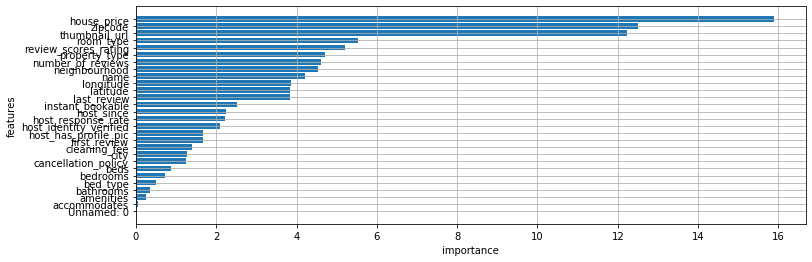

In [142]:
from matplotlib import pyplot as plt
from sklearn import datasets
# 特徴量の重要度を取得する
feature_importance = model.get_feature_importance()
feature_importance.sort()
# 棒グラフとしてプロットする
plt.figure(figsize=(12, 4))
plt.barh(range(len(feature_importance)),
        feature_importance,
        tick_label=X_raw.keys())

plt.xlabel('importance')
plt.ylabel('features')
plt.grid()
plt.show()

In [143]:
feature_importance.sort()
feature_importance

array([ 0.        ,  0.06326435,  0.25035982,  0.3395601 ,  0.49863814,
        0.71484515,  0.87254306,  1.23750785,  1.26769531,  1.40631941,
        1.66504008,  1.68084908,  2.09138543,  2.20852624,  2.25418575,
        2.50730758,  3.83149012,  3.84525728,  3.85232929,  4.20223852,
        4.54312891,  4.60355624,  4.7189045 ,  5.20190551,  5.52916933,
       12.21798473, 12.51375443, 15.88225376])

In [144]:
X_raw["accommodates"].head()

0    6
1    2
2    2
3    2
4    2
Name: accommodates, dtype: int64